# Before you begin


1.   Use the [Cloud Resource Manager](https://console.cloud.google.com/cloud-resource-manager) to Create a Cloud Platform project if you do not already have one.
2.   [Enable billing](https://support.google.com/cloud/answer/6293499#enable-billing) for the project.
3.   [Enable BigQuery](https://console.cloud.google.com/flows/enableapi?apiid=bigquery) APIs for the project.


### Provide your Google Cloud credentials to the runtime

In [1]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


## Optional: Enable data table display

Colab includes the ``google.colab.data_table`` package that can be used to display large pandas dataframes as an interactive data table.
It can be enabled with:

In [2]:
%load_ext google.colab.data_table

If you would prefer to return to the classic Pandas dataframe display, you can disable this by running:
```python
%unload_ext google.colab.data_table
```

Declare the Cloud project ID which will be used throughout this notebook

In [3]:
project_id = 'zeta-time-368105'

In [4]:
!gcloud config list

[component_manager]
disable_update_check = True
[core]
account = rohan.patel@sjsu.edu

Your active configuration is: [default]


In [5]:
#!gcloud config set compute/region us-central1
#!gcloud config set compute/zone us-central1-a
!gcloud config list project

[core]
project (unset)

Your active configuration is: [default]


In [6]:
!gcloud config set project 'zeta-time-368105'

Updated property [core/project].


In [7]:
!gcloud config list project

[core]
project = zeta-time-368105

Your active configuration is: [default]


# Check my BigQuery Data

In [8]:
from google.cloud import bigquery

# https://cloud.google.com/resource-manager/docs/creating-managing-projects
project_id = 'zeta-time-368105'
client = bigquery.Client(project=project_id)

#Print your current data
for dataset in client.list_datasets():
  print(dataset.dataset_id)

austin_crime_data


# Austin Crime Dataset

In [9]:
query1 = """ SELECT 
  * 
  FROM 
    `zeta-time-368105.austin_crime_data.crime` 
  LIMIT 1000 
  """
dfquery = client.query(query1)

In [10]:
# query from dataset
df_origin = dfquery.to_dataframe()
df_origin.head()

,unique_key,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,longitude,location,location_description,primary_type,timestamp,x_coordinate,y_coordinate,year,zipcode
0,20165002898,"Austin, TX",NaN,2016-03-14 12:00:00+00:00,Not cleared,<NA>,RAPE,UK,NaN,NaN,None,nan,Rape,2016-01-19 12:00:00+00:00,<NA>,<NA>,2016,None
1,20165004843,"Austin, TX",NaN,2016-03-31 12:00:00+00:00,Not cleared,<NA>,RAPE,UK,NaN,NaN,None,nan,Rape,2016-01-25 12:00:00+00:00,<NA>,<NA>,2016,None
2,2016250988,"Austin, TX",NaN,2016-09-16 12:00:00+00:00,Not cleared,<NA>,RAPE,UK,NaN,NaN,None,nan,Rape,2016-01-25 12:00:00+00:00,<NA>,<NA>,2016,None
3,20165003839,"Austin, TX",NaN,2016-02-09 12:00:00+00:00,Not cleared,<NA>,AGG RAPE OF A CHILD,UK,NaN,NaN,None,nan,Rape,2016-01-27 12:00:00+00:00,<NA>,<NA>,2016,None
4,2016321746,"Austin, TX",NaN,2016-03-22 12:00:00+00:00,Not cleared,<NA>,RAPE OF A CHILD,UK,NaN,NaN,None,nan,Rape,2016-02-01 12:00:00+00:00,<NA>,<NA>,2016,None


In [11]:
# dataset information
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   unique_key             1000 non-null   Int64              
 1   address                1000 non-null   object             
 2   census_tract           477 non-null    float64            
 3   clearance_date         840 non-null    datetime64[ns, UTC]
 4   clearance_status       840 non-null    object             
 5   council_district_code  477 non-null    Int64              
 6   description            1000 non-null   object             
 7   district               1000 non-null   object             
 8   latitude               269 non-null    float64            
 9   longitude              269 non-null    float64            
 10  location               269 non-null    object             
 11  location_description   1000 non-null   object            


## Austin crime trend over the years

In [12]:
query2 = """ SELECT  
unique_key, description, year, clearance_status, clearance_date
FROM 
  `zeta-time-368105.austin_crime_data.crime` 

WHERE
  year >= 2012
  AND year <= 2022

ORDER BY
  year

 """

dfquery = client.query(query2)

In [13]:
merged_df = dfquery.to_dataframe()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116675 entries, 0 to 116674
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   unique_key        116674 non-null  Int64              
 1   description       116675 non-null  object             
 2   year              116675 non-null  Int64              
 3   clearance_status  111561 non-null  object             
 4   clearance_date    111561 non-null  datetime64[ns, UTC]
dtypes: Int64(2), datetime64[ns, UTC](1), object(2)
memory usage: 4.7+ MB


In [14]:
merged_df.head()

,unique_key,description,year,clearance_status,clearance_date
0,20145022722,AGG ROBBERY/DEADLY WEAPON,2014,Not cleared,2014-07-03 12:00:00+00:00
1,2014390620,AGG ASLT STRANGLE/SUFFOCATE,2014,Cleared by Exception,2014-02-19 12:00:00+00:00
2,20145027962,BURGLARY OF RESIDENCE,2014,None,NaT
3,20142711475,ROBBERY BY ASSAULT,2014,Cleared by Exception,2014-10-01 12:00:00+00:00
4,20142910412,AGG ASLT STRANGLE/SUFFOCATE,2014,Cleared by Arrest,2014-10-29 12:00:00+00:00


In [15]:
# ref: https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
# get annual crime amount and arrest number

crime_count = merged_df.groupby('year').agg({'unique_key' : 'count'})
crime_count = crime_count.rename(columns = {'unique_key': 'crime count'})
description_type = merged_df['description'].unique()

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

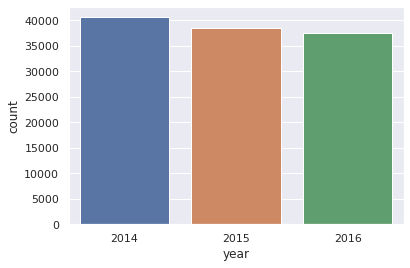

In [17]:
sns.countplot(x = "year", data = merged_df)

## 15 highest crime risk locations

In [18]:
query3 = """ SELECT  
    location_description	AS loc,
    COUNT(unique_key) AS loc_count
FROM 
  `zeta-time-368105.austin_crime_data.crime`
WHERE
  year < 2022
GROUP BY location_description	
ORDER BY
  location_description	

LIMIT 1000
      """

dfquery = client.query(query3)

In [19]:
df_locCount = dfquery.to_dataframe()
df_locCount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   loc        1000 non-null   object
 1   loc_count  1000 non-null   Int64 
dtypes: Int64(1), object(1)
memory usage: 16.7+ KB


In [20]:
# ref: https://stackoverflow.com/questions/45512763/python-pandas-dataframe-remove-all-rows-where-none-is-the-value-in-any-column
# drop none value
df_locCount = df_locCount.dropna(how = 'any')
df_locCount.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   loc        1000 non-null   object
 1   loc_count  1000 non-null   Int64 
dtypes: Int64(1), object(1)
memory usage: 24.4+ KB


In [21]:
df_locCount.head()

,loc,loc_count
0,1 OLMOS DR,1
1,10 BLOCK N IH 35 NB,1
2,10 N PLEASANT VALLEY RD,1
3,10-4710 S LAMAR BLVD SVRD SB,1
4,100 ACADEMY DR,1


In [22]:
# add auxiliary column for grouping by
df_locCount['location'] = df_locCount['loc'].apply(lambda x: x.split()[0])
df_locCount

,loc,loc_count,location
0,1 OLMOS DR,1,1
1,10 BLOCK N IH 35 NB,1,10
2,10 N PLEASANT VALLEY RD,1,10
3,10-4710 S LAMAR BLVD SVRD SB,1,10-4710
4,100 ACADEMY DR,1,100
...,...,...,...
995,1022 BRIARGATE DR,1,1022
996,1022 GARDNER RD,2,1022
997,1022 PAYTON GIN RD,1,1022
998,10220 ANNIE OAKLEY TRL,1,10220


In [23]:
# ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
# group by location and sort in descending order
loc_group = df_locCount.groupby('location').agg({'loc_count' : 'sum'})
loc_group = loc_group.rename(columns = {'loc_count' : 'count'}).sort_values('count', ascending = False)
loc_group

,count
location,
1000,914
10107,223
10000,173
100,160
1007,119
...,...
10068,1
10161,1
10051,1


In [24]:
import numpy as np
# store locations and crime number to numpy array separately
location = loc_group.index.to_numpy()
count = loc_group.to_numpy()

# group all locations other than the top 12 into one category and name it "others"
head_loc = location[:12]
head_loc = np.append(head_loc, 'OTHERS')
# head_loc

# group all crime count other than the top 12 into one category and add to count array
tail = count[12:].sum()
head_count = count[0:12]
head_count = np.append(head_count, tail)
# head_count

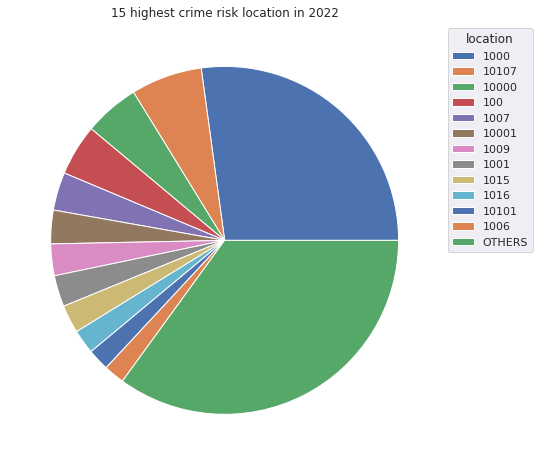

In [25]:
# ref: https://itueconomics.github.io/bil113e/python4-data-visualization.html
# plot a pie chart
fig = plt.figure(figsize = (15, 8))

plt.pie(head_count, labels = head_loc, labeldistance = None)
plt.legend(title = 'location', bbox_to_anchor = (1, 1))
plt.title('15 highest crime risk location in 2022')
fig.savefig("/content/fig2.svg")

In [26]:
query4 = """ 
SELECT primary_type AS crime_type, count(unique_key) AS count
FROM `zeta-time-368105.austin_crime_data.crime`
WHERE
  year < 2022
GROUP BY  
  primary_type

LIMIT 1000
      """

dfquery = client.query(query4)
df = dfquery.to_dataframe()
df

,crime_type,count
0,Rape,1801
1,Theft,54514
2,Robbery,2859
3,Aggravated Assault,1888
4,Agg Assault,4092
5,Auto Theft,6231
6,Burglary / \nBreaking & Entering,5670
7,Burglary,10098
8,Theft: All Other Larceny,13539
9,Theft: BOV,10545


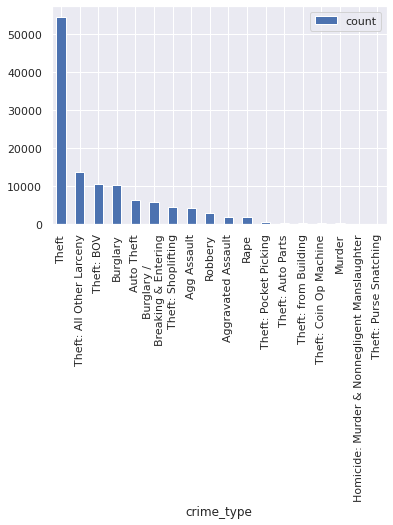

In [27]:
df_type = df.sort_values('count', ascending = False)
df_type.plot.bar(x = 'crime_type')

## interactive pie chart

In [28]:
!pip install plotly

import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
!pip install -U kaleido #Image export using the "kaleido" engine requires the kaleido package

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.6 MB/s eta 0:00:00


In [30]:
loc_group.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127 entries, 1000 to 1
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   127 non-null    Int64
dtypes: Int64(1)
memory usage: 2.1+ KB


In [31]:
loc_group = loc_group.reset_index()
loc_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   location  127 non-null    object
 1   count     127 non-null    Int64 
dtypes: Int64(1), object(1)
memory usage: 2.2+ KB


In [32]:
# ref: https://plotly.com/python/pie-charts/
# group low risk locations
loc_group.loc[loc_group['count'] < 400, 'location'] = 'Others'
fig = px.pie(loc_group, values='count', names='location', title='High risk locations in Austin')
fig.show()
#fig.write_image("/content/fig3.svg")

In [33]:
%%capture
!pip install kaleido
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [34]:
fig.write_image("/content/fig3.svg")

In [35]:
fig.write_image("/content/fig3.pdf")

## Crime heat map for Austin until year 2022

In [36]:
query5 = """ SELECT  
  count(unique_key) AS count,
  latitude, longitude
FROM 
  `zeta-time-368105.austin_crime_data.crime` 

WHERE
  year < 2022

GROUP BY
  latitude, longitude

LIMIT 
  1000 """

dfquery = client.query(query5)

In [37]:
df_geo = dfquery.to_dataframe()
df_geo.head()

,count,latitude,longitude
0,82174,NaN,NaN
1,28,30.264979,-97.746598
2,1,30.242457,-97.783940
3,1,30.236083,-97.844218
4,1,30.281456,-97.741000


In [38]:
# ref: https://plotly.com/python/mapbox-density-heatmaps/
fig = px.density_mapbox(df_geo, lat='latitude', lon='longitude', radius=10,
                        center=dict(lat=30.2672, lon=-97.7431), zoom=9.0, hover_name = 'count',
                        mapbox_style='stamen-terrain')
fig.show()
fig.write_image("/content/fig4.svg")